In [1]:
import sys
import math
import random
import numpy as np
from matplotlib import cm
from numpy import exp,arange
import matplotlib.pyplot as plt
from numpy.random import randint, rand
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import GridSearchCV, train_test_split
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
def humps(x):
    return 1/((x-0.3)**2+0.01) + 1/((x-0.9)**2+0.04) - 6

In [3]:
x_vals = np.arange(-5,5,0.1)
y_vals = humps(x_vals)
y_max = y_vals.max()
y_vals /= y_max

In [4]:
def z_func(x, y):
    return  (x**2 + y**2)*humps(x)#*(1/((x-0.3)**2+0.01) + 1/((x-0.9)**2+0.04) - 6)

In [5]:
x = np.arange(-5, 5, 0.1)
xy = [(j,k) for j in x for k in x]
out = [z_func(p[0],p[1]) for p in xy]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(xy, out)

In [7]:
len(x_train)

7500

In [8]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

def modelMLPRegressor(layers=[30], max_iter = 100):
    # set up network with parameters
    mlp = MLPRegressor(
        hidden_layer_sizes=layers,
        max_iter=max_iter,
        tol=0,
    )
    return mlp

In [9]:
def modelMLPRegressorBatch(layers=[30], max_iter = 100):
    # set up network with parameters
    mlp = MLPRegressor(
        hidden_layer_sizes=layers,
        max_iter=max_iter,
        batch_size = 1000,
        tol=0,
    )
    return mlp

# First State

mse1=6377.032451473826
mlp1.score=0.8034808755826162
mlp1 Loss=3282.713261406715
mlp1 Best Loss is =3282.713261406715


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


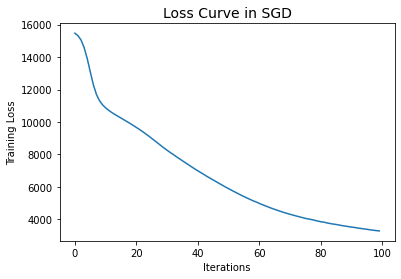

In [10]:
layers=[30, 20]
max_iter = 100
mlp1 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp1.fit(x_train,y_train)

# test
predictions = mlp1.predict(x_test)

mse1 = mean_squared_error(y_test, predictions)
print(f"mse1={mse1}")

print(f"mlp1.score={mlp1.score(x_test, y_test)}")
print(f"mlp1 Loss={mlp1.loss_}")
print(f"mlp1 Best Loss is ={mlp1.best_loss_}")
plt.plot(mlp1.loss_curve_)
plt.title("Loss Curve in SGD", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

mseb1=22795.852652101832
mlpb1.score=0.29750694580464343
mlpb1 Loss=9479.284856967584
mlpb1 Best Loss is =9479.284856967584


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


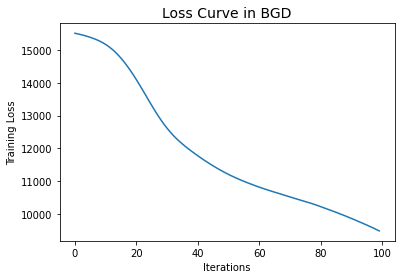

In [11]:
layers=[30, 20]
max_iter = 100
mlpb1 = modelMLPRegressorBatch(layers=layers, max_iter=max_iter)
# train network
mlpb1.fit(x_train,y_train)

# test
predictions = mlpb1.predict(x_test)

mseb1 = mean_squared_error(y_test, predictions)
print(f"mseb1={mseb1}")

print(f"mlpb1.score={mlpb1.score(x_test, y_test)}")
print(f"mlpb1 Loss={mlpb1.loss_}")
print(f"mlpb1 Best Loss is ={mlpb1.best_loss_}")
plt.plot(mlpb1.loss_curve_)
plt.title("Loss Curve in BGD", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

In [12]:
len(mlp1.coefs_)

3

In [13]:
mlp1.coefs_[0]

array([[-8.04701495e-01,  2.16871177e+00, -2.71816422e+00,
        -2.08657460e+00,  2.16110142e+00,  2.10015324e+00,
        -2.44020973e+00,  1.77184382e+00,  2.04861163e+00,
        -1.16439288e-03,  1.84183090e+00,  3.09291475e-01,
         2.05650578e+00,  2.05213260e+00, -2.52378809e+00,
        -2.43624453e+00, -3.93160948e-01, -2.84114700e+00,
         2.08558078e+00, -2.80717300e+00,  2.15850616e+00,
         1.94345714e+00, -2.30954984e+00, -2.33574142e+00,
         1.70641340e+00,  3.10710761e-02,  2.12542849e+00,
        -1.98069007e+00,  2.04457901e+00,  2.17229033e+00],
       [ 2.14715072e+00, -2.54062673e-04, -1.66002149e-03,
        -9.85259036e-04, -1.34640082e+00, -8.26199551e-01,
        -2.34216466e-03, -1.97207957e-03, -7.30997907e-01,
        -1.75160495e-02,  1.23550353e+00, -1.56005261e+00,
         5.65832940e-04, -2.70211982e-03, -1.18621381e-03,
         6.91992084e-04, -1.88604650e+00,  6.94043656e-04,
        -5.88073036e-04, -6.78686590e-04,  2.03864589e-

In [14]:
np.where(abs(mlp1.coefs_[2])> 50)

(array([], dtype=int64), array([], dtype=int64))

In [15]:
mlp1.coefs_[2]

array([[-9.48045032e-01],
       [-1.29487953e+00],
       [ 2.98658146e+00],
       [ 6.05850320e-18],
       [-9.53843229e-01],
       [ 2.82426247e+00],
       [-1.01360386e+00],
       [-1.09707645e+00],
       [-9.77552863e-01],
       [-7.61026448e-01],
       [ 3.83729825e+00],
       [-1.47641240e+00],
       [-9.57792670e-01],
       [ 3.38449196e+00],
       [-1.03030641e+00],
       [-1.50009882e+00],
       [-1.64759589e+00],
       [ 3.00552901e+00],
       [-7.69368659e-01],
       [-1.12764543e+00]])

In [16]:
layers = np.arange(10, 110, 10)
layers

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [17]:
layers = layers[::-1]
print(layers)

[100  90  80  70  60  50  40  30  20  10]


# Second State

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


mse2=310.12984357809455
mlp2.score=0.9904428202648425
mlp2 Loss=94.78978647214964
mlp2 Best Loss is =93.37657832440023


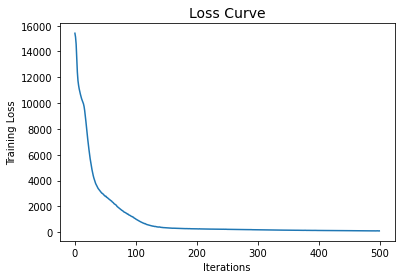

In [18]:
layers=[30, 20, 10]
max_iter = 500
mlp2 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp2.fit(x_train,y_train)

# test
predictions = mlp2.predict(x_test)

mse2 = mean_squared_error(y_test, predictions)
print(f"mse2={mse2}")

print(f"mlp2.score={mlp2.score(x_test, y_test)}")
print(f"mlp2 Loss={mlp2.loss_}")
print(f"mlp2 Best Loss is ={mlp2.best_loss_}")
plt.plot(mlp2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Third State

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


mse3=24775.893268174565
mlp3.score=0.236488619311489
mlp3 Loss=10174.793386068128
mlp3 Best Loss is =10174.793386068128


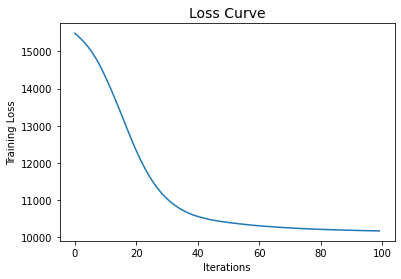

In [19]:
layers=[30]
max_iter = 100
mlp3 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp3.fit(x_train,y_train)

# test
predictions = mlp3.predict(x_test)

mse3 = mean_squared_error(y_test, predictions)
print(f"mse3={mse3}")

print(f"mlp3.score={mlp3.score(x_test, y_test)}")
print(f"mlp3 Loss={mlp3.loss_}")
print(f"mlp3 Best Loss is ={mlp3.best_loss_}")
plt.plot(mlp3.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Forth State

mse4=23117.69761272206
mlp4.score=0.287588744769832
mlp4 Loss=9544.21721625173
mlp4 Best Loss is =9544.21721625173


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


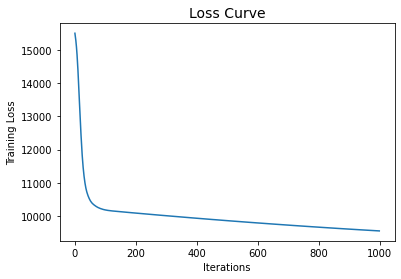

In [20]:
layers=[30]
max_iter = 1000
mlp4 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp4.fit(x_train,y_train)

# test
predictions = mlp4.predict(x_test)

mse4 = mean_squared_error(y_test, predictions)
print(f"mse4={mse4}")

print(f"mlp4.score={mlp4.score(x_test, y_test)}")
print(f"mlp4 Loss={mlp4.loss_}")
print(f"mlp4 Best Loss is ={mlp4.best_loss_}")
plt.plot(mlp4.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

# Fifth State

mse5=23819.97668483292
mlp5.score=0.26594681815301147
mlp5 Loss=9821.840227866858
mlp5 Best Loss is =9821.840227866858


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


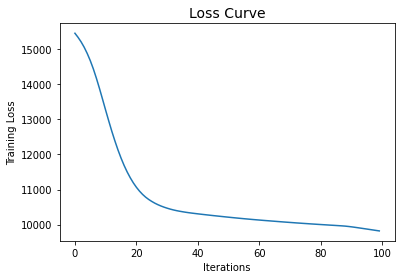

In [21]:
layers=[60]
max_iter = 100
mlp5 = modelMLPRegressor(layers=layers, max_iter=max_iter)
# train network
mlp5.fit(x_train,y_train)

# test
predictions = mlp5.predict(x_test)

mse5 = mean_squared_error(y_test, predictions)
print(f"mse5={mse5}")

print(f"mlp5.score={mlp5.score(x_test, y_test)}")
print(f"mlp5 Loss={mlp5.loss_}")
print(f"mlp5 Best Loss is ={mlp5.best_loss_}")
plt.plot(mlp5.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

In [22]:
def MLPModelBatch(hidden_layer_sizes, iter_number, x_train, y_train, x_test, y_test, batch_size = 100):

    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                       batch_size = batch_size)

    losses = []
    test_performance = []

    for epoch in range(iter_number):
        # print(f"epoch={epoch}")
        # Make 100 passes over the batches

        # for batch in range(500, 7501, 500):
            # Perform partial fits on batches of 500 examples

            # Simulate batches, these could also be loaded from `.npy`
            # X_train_batch = X_train[batch-500:batch]
            # y_train_batch = y_train[batch-500:batch]

        # regr.partial_fit(x_train, y_train)
        mlp.partial_fit(x_train, y_train)

        losses.append(mlp.loss_)
        test_performance.append(mlp.score(x_test, y_test))

    predictions = mlp.predict(x_test)
    mse = mean_squared_error(y_test, predictions)

    return losses, test_performance, mse, mlp.loss_, mlp.best_loss_, mlp.loss_curve_

In [23]:
def MLPModel(hidden_layer_sizes, iter_number, x_train, y_train, x_test, y_test):

    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                       batch_size = 1)

    losses = []
    test_performance = []

    for epoch in range(iter_number):
        # print(f"epoch={epoch}")
        # Make 100 passes over the batches

        # for batch in range(500, 7501, 500):
            # Perform partial fits on batches of 500 examples

            # Simulate batches, these could also be loaded from `.npy`
            # X_train_batch = X_train[batch-500:batch]
            # y_train_batch = y_train[batch-500:batch]

        # regr.partial_fit(x_train, y_train)
        mlp.partial_fit(x_train, y_train)

        losses.append(mlp.loss_)
        test_performance.append(mlp.score(x_test, y_test))

    predictions = mlp.predict(x_test)
    mse = mean_squared_error(y_test, predictions)

    return losses, test_performance, mse, mlp.loss_, mlp.best_loss_, mlp.loss_curve_

In [24]:
iter_number = 500
batch_size = len(x_train)

# First State

for model 1: mlp.score=0.9951372767035574, mse=157.79504593197106, loss_=42.99792049810207, best_loss=37.029984416395095


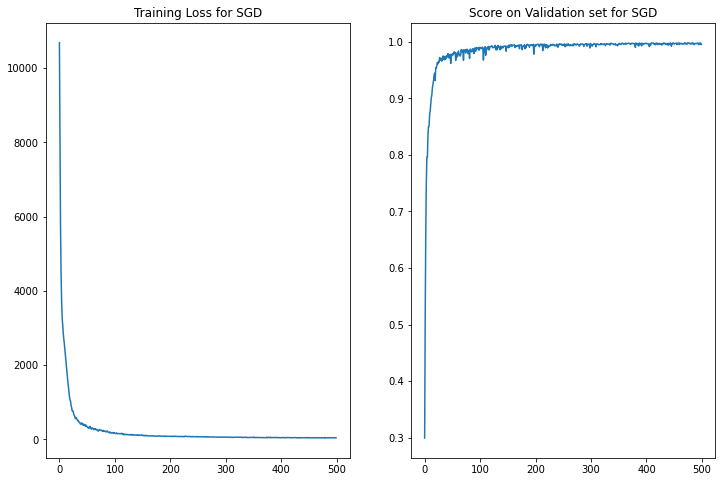

<Figure size 720x360 with 0 Axes>

In [25]:
hidden_layer_sizes = [30, 20]
losses_1, test_performance_1, mse_1, loss_1, best_loss_1, loss_curve_1 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 1: mlp.score={test_performance_1[-1]}, mse={mse_1}, loss_={loss_1}, best_loss={best_loss_1}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))
ax1.title.set_text("Training Loss for SGD")
ax2.title.set_text("Score on Validation set for SGD")
ax1.plot(range(len(losses_1)), losses_1)
ax2.plot(range(len(test_performance_1)), test_performance_1)
plt.show()

for model 1: mlp.score=0.2557901396075257, mse=24149.56022473404, loss_=10006.083751827367, best_loss=10006.083751827367


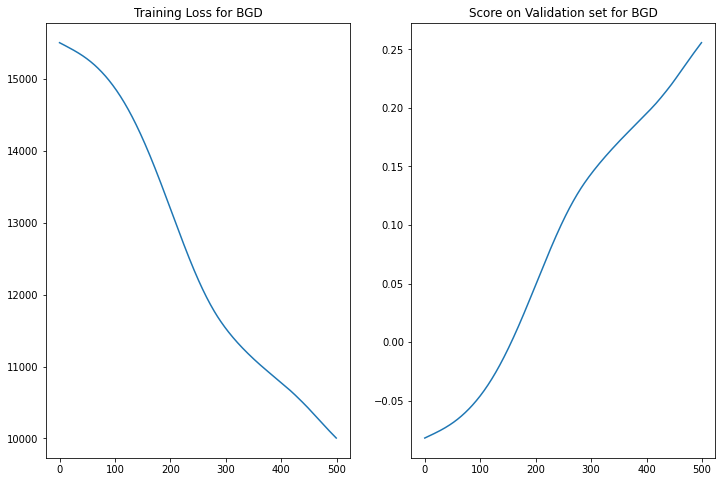

<Figure size 720x360 with 0 Axes>

In [26]:
hidden_layer_sizes = [30, 20]
losses_b_1, test_performance_b_1, mse_b_1, loss_b_1, best_loss_b_1, loss_curve_b_1 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = batch_size)
print(f"for model 1: mlp.score={test_performance_b_1[-1]}, mse={mse_b_1}, loss_={loss_b_1}, best_loss={best_loss_b_1}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))
ax1.title.set_text("Training Loss for BGD")
ax2.title.set_text("Score on Validation set for BGD")
ax1.plot(range(len(losses_b_1)), losses_b_1)
ax2.plot(range(len(test_performance_b_1)), test_performance_b_1)
plt.show()

for model 1: mlp.score=0.9862193706466156, mse=447.1805013827542, loss_=156.28514340126762, best_loss=156.28514340126762


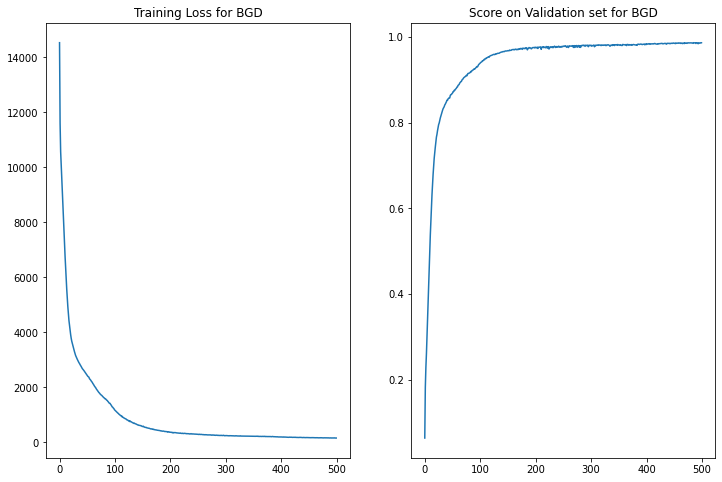

<Figure size 720x360 with 0 Axes>

In [30]:
hidden_layer_sizes = [30, 20]
losses_b32_1, test_performance_b32_1, mse_b32_1, loss_b32_1, best_loss_b32_1, loss_curve_b32_1 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = 32)
print(f"for model 1: mlp.score={test_performance_b32_1[-1]}, mse={mse_b32_1}, loss_={loss_b32_1}, best_loss={best_loss_b32_1}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))
ax1.title.set_text("Training Loss for BGD")
ax2.title.set_text("Score on Validation set for MiniBatchGD 32")
ax1.plot(range(len(losses_b32_1)), losses_b32_1)
ax2.plot(range(len(test_performance_b32_1)), test_performance_b32_1)
plt.show()

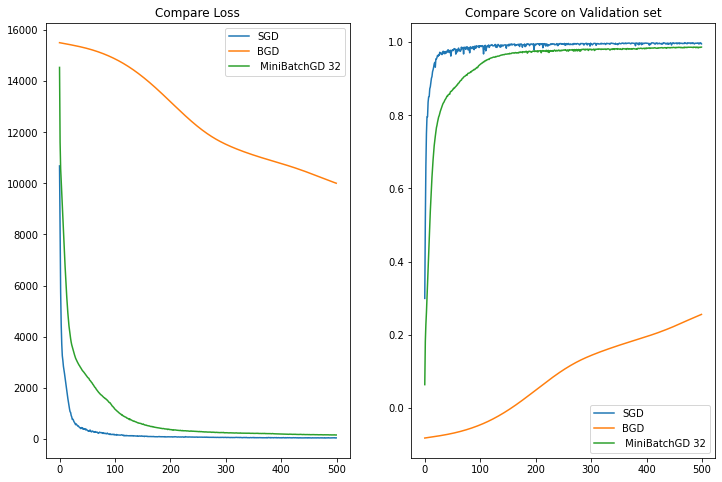

<Figure size 720x360 with 0 Axes>

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))

ax1.title.set_text("Compare Loss")
ax1.plot(range(len(losses_1)), losses_1, label = "SGD")
ax1.plot(range(len(losses_b_1)), losses_b_1, label = "BGD")
ax1.plot(range(len(losses_b32_1)), losses_b32_1, label = "MiniBatchGD 32")
ax1.legend(loc="upper right")

ax2.title.set_text("Compare Score on Validation set")
ax2.plot(range(len(test_performance_1)), test_performance_1, label = "SGD")
ax2.plot(range(len(test_performance_b_1)), test_performance_b_1, label = "BGD")
ax2.plot(range(len(test_performance_b32_1)), test_performance_b32_1, label = "MiniBatchGD 32")
ax2.legend(loc="lower right")

In [28]:
# x = range(1, len(test_performance_1)+1)
# plt.figure(figsize=(10,8))
# plt.plot(x, test_performance_1, label = "SGD")
# plt.plot(x, test_performance_b_1, label = "BGD")
# plt.xlabel("Iterations")
# plt.ylabel("Performance")
# plt.title('Compare Performance of SGD and BGD')
# plt.legend()
# plt.show()

# Second State

for model 2: mlp.score=0.9964161346965389, mse=116.29618954205452, loss_=32.15156105458848, best_loss=25.590424473072293


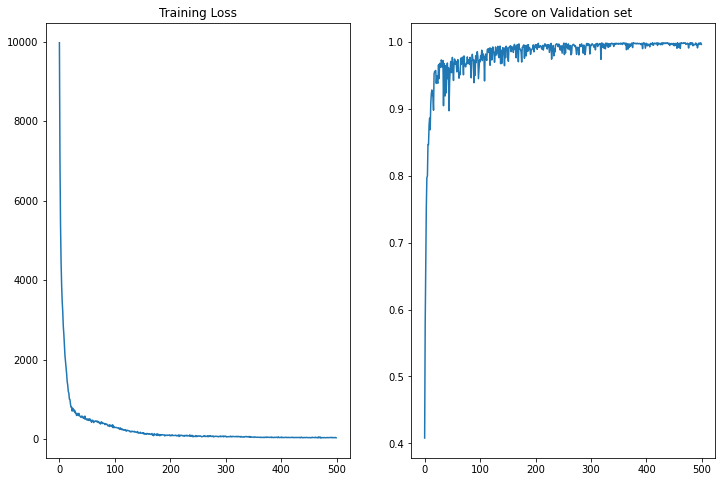

In [33]:
hidden_layer_sizes = [30, 20, 10]
losses_2, test_performance_2, mse_2, loss_2, best_loss_2, loss_curve_2 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 2: mlp.score={test_performance_2[-1]}, mse={mse_2}, loss_={loss_2}, best_loss={best_loss_2}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_2)), losses_2)
ax2.plot(range(len(test_performance_2)), test_performance_2)
plt.show()

for model 2: mlp.score=0.2726266765925466, mse=23603.215724969825, loss_=9737.172965045595, best_loss=9737.172965045595


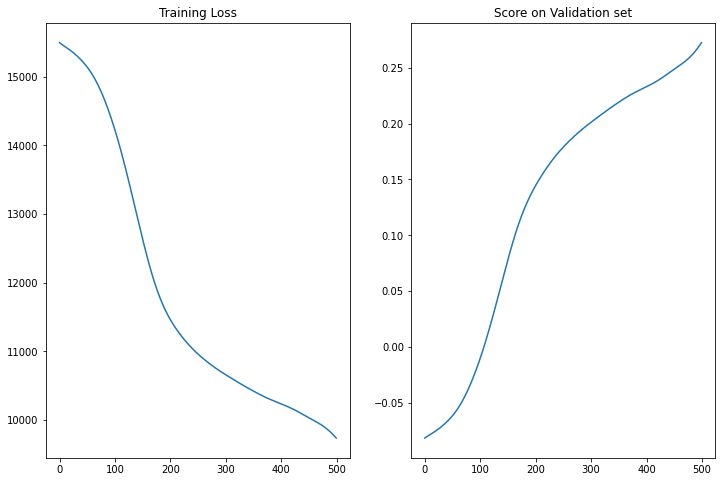

In [34]:
hidden_layer_sizes = [30, 20, 10]
losses_b_2, test_performance_b_2, mse_b_2, loss_b_2, best_loss_b_2, loss_curve_b_2 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = batch_size)
print(f"for model 2: mlp.score={test_performance_b_2[-1]}, mse={mse_b_2}, loss_={loss_b_2}, best_loss={best_loss_b_2}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_b_2)), losses_b_2)
ax2.plot(range(len(test_performance_b_2)), test_performance_b_2)
plt.show()

for model 2: mlp.score=0.988318695940717, mse=379.0575359137462, loss_=60.62544179791304, best_loss=60.18252470494303


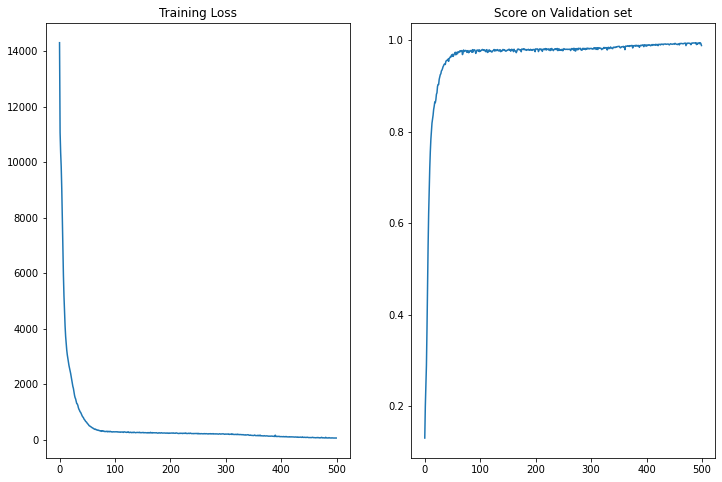

In [35]:
hidden_layer_sizes = [30, 20, 10]
losses_b32_2, test_performance_b32_2, mse_b32_2, loss_b32_2, best_loss_b32_2, loss_curve_b32_2 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = 32)
print(f"for model 2: mlp.score={test_performance_b32_2[-1]}, mse={mse_b32_2}, loss_={loss_b32_2}, best_loss={best_loss_b32_2}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_b32_2)), losses_b32_2)
ax2.plot(range(len(test_performance_b32_2)), test_performance_b32_2)
plt.show()

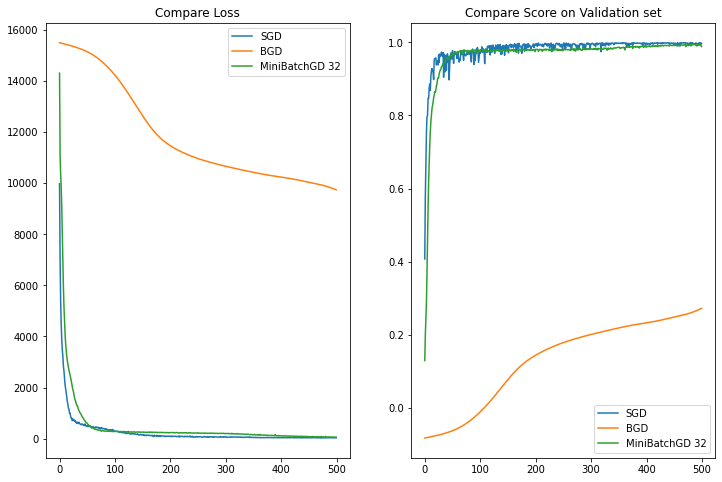

<Figure size 720x360 with 0 Axes>

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))

ax1.title.set_text("Compare Loss")
ax1.plot(range(len(losses_2)), losses_2, label = "SGD")
ax1.plot(range(len(losses_b_2)), losses_b_2, label = "BGD")
ax1.plot(range(len(losses_b32_2)), losses_b32_2, label = "MiniBatchGD 32")
ax1.legend(loc="upper right")

ax2.title.set_text("Compare Score on Validation set")
ax2.plot(range(len(test_performance_2)), test_performance_2, label = "SGD")
ax2.plot(range(len(test_performance_b_2)), test_performance_b_2, label = "BGD")
ax2.plot(range(len(test_performance_b32_2)), test_performance_b32_2, label = "MiniBatchGD 32")
ax2.legend(loc="lower right")

# Third State

for model 3: mlp.score=0.8556201981576227, mse=4685.114919048333, loss_=2353.1872972296, best_loss=2353.1872972296


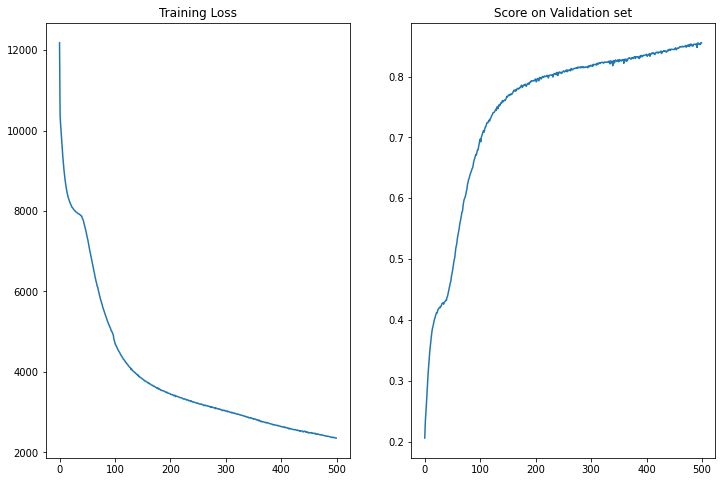

In [37]:
hidden_layer_sizes = [30]
losses_3, test_performance_3, mse_3, loss_3, best_loss_3, loss_curve_3 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 3: mlp.score={test_performance_3[-1]}, mse={mse_3}, loss_={loss_3}, best_loss={best_loss_3}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_3)), losses_3)
ax2.plot(range(len(test_performance_3)), test_performance_3)
plt.show()

for model 3: mlp.score=0.014270164259958973, mse=31986.867280913604, loss_=13761.03983525469, best_loss=13761.03983525469


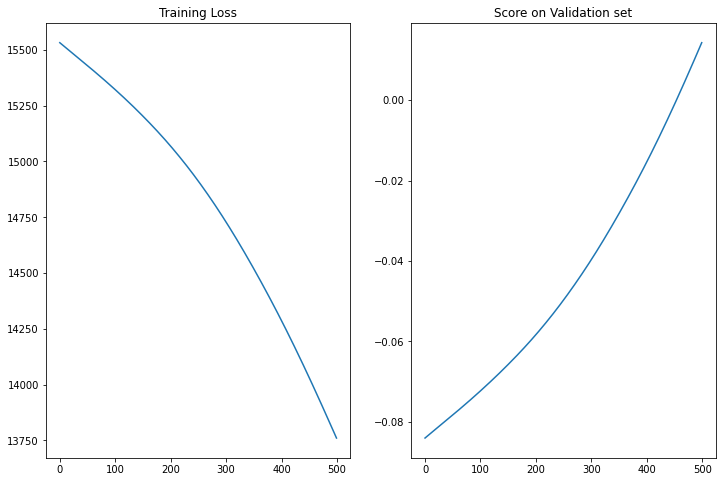

In [38]:
hidden_layer_sizes = [30]
losses_b_3, test_performance_b_3, mse_b_3, loss_b_3, best_loss_b_3, loss_curve_b_3 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = batch_size)
print(f"for model 3: mlp.score={test_performance_b_3[-1]}, mse={mse_b_3}, loss_={loss_b_3}, best_loss={best_loss_b_3}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_b_3)), losses_b_3)
ax2.plot(range(len(test_performance_b_3)), test_performance_b_3)
plt.show()

for model 3: mlp.score=0.7000969511435089, mse=9731.833889061469, loss_=4613.417159296332, best_loss=4613.417159296332


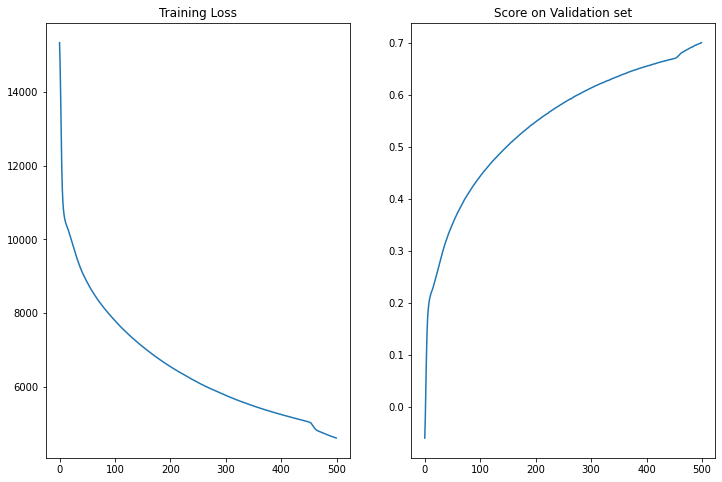

In [39]:
hidden_layer_sizes = [30]
losses_b32_3, test_performance_b32_3, mse_b32_3, loss_b32_3, best_loss_b32_3, loss_curve_b32_3 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = 32)
print(f"for model 3: mlp.score={test_performance_b32_3[-1]}, mse={mse_b32_3}, loss_={loss_b32_3}, best_loss={best_loss_b32_3}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_b32_3)), losses_b32_3)
ax2.plot(range(len(test_performance_b32_3)), test_performance_b32_3)
plt.show()

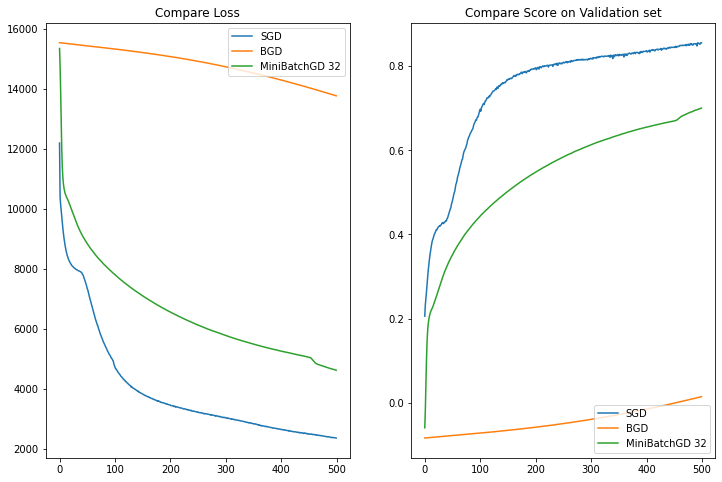

<Figure size 720x360 with 0 Axes>

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))

ax1.title.set_text("Compare Loss")
ax1.plot(range(len(losses_3)), losses_3, label = "SGD")
ax1.plot(range(len(losses_b_3)), losses_b_3, label = "BGD")
ax1.plot(range(len(losses_b32_3)), losses_b32_3, label = "MiniBatchGD 32")
ax1.legend(loc="upper right")

ax2.title.set_text("Compare Score on Validation set")
ax2.plot(range(len(test_performance_3)), test_performance_3, label = "SGD")
ax2.plot(range(len(test_performance_b_3)), test_performance_b_3, label = "BGD")
ax2.plot(range(len(test_performance_b32_3)), test_performance_b32_3, label = "MiniBatchGD 32")
ax2.legend(loc="lower right")

# Forth State

In [ ]:
# hidden_layer_sizes = [30]
# losses_4, test_performance_4, mse_4, loss_4, best_loss_4, loss_curve_4 = MLPModel(hidden_layer_sizes, iter_number = 2000,
#                                                                                      x_train, y_train, x_test, y_test)
# print(f"for model 4: mlp.score={test_performance_4[-1]}, mse={mse_4}, loss_={loss_4}, best_loss={best_loss_4}")
# # Plotting results:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
# ax1.title.set_text("Training Loss")
# ax2.title.set_text("Score on Validation set")
# ax1.plot(range(len(losses_4)), losses_4)
# ax2.plot(range(len(test_performance_4)), test_performance_4)
# plt.show()

In [ ]:
# hidden_layer_sizes = [30]
# losses_b_4, test_performance_b_4, mse_b_4, loss_b_4, best_loss_b_4, loss_curve_b_4 = MLPModelBatch(hidden_layer_sizes, iter_number = 2000,
#                                                                                                    x_train, y_train, x_test, y_test, batch_size = batch_size)
# print(f"for model 4: mlp.score={test_performance_b_4[-1]}, mse={mse_b_4}, loss_={loss_b_4}, best_loss={best_loss_b_4}")
# # Plotting results:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
# ax1.title.set_text("Training Loss")
# ax2.title.set_text("Score on Validation set")
# ax1.plot(range(len(losses_b_4)), losses_b_4)
# ax2.plot(range(len(test_performance_b_4)), test_performance_b_4)
# plt.show()

In [ ]:
# hidden_layer_sizes = [30]
# losses_b32_4, test_performance_b32_4, mse_b32_4, loss_b32_4, best_loss_b32_4, loss_curve_b32_4 = MLPModelBatch(hidden_layer_sizes, iter_number = 2000,
#                                                                                                    x_train, y_train, x_test, y_test, batch_size = 32)
# print(f"for model 4: mlp.score={test_performance_b32_4[-1]}, mse={mse_b32_4}, loss_={loss_b32_4}, best_loss={best_loss_b32_4}")
# # Plotting results:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
# ax1.title.set_text("Training Loss")
# ax2.title.set_text("Score on Validation set")
# ax1.plot(range(len(losses_b32_4)), losses_b32_4)
# ax2.plot(range(len(test_performance_b32_4)), test_performance_b32_4)
# plt.show()

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
# fig = plt.figure(figsize=(10,5))

# ax1.title.set_text("Compare Loss")
# ax1.plot(range(len(losses_4)), losses_4, label = "SGD")
# ax1.plot(range(len(losses_b_4)), losses_b_4, label = "BGD")
# ax1.plot(range(len(losses_b32_4)), losses_b32_4, label = "MiniBatchGD 32")
# ax1.legend(loc="upper right")

# ax2.title.set_text("Compare Score on Validation set")
# ax2.plot(range(len(test_performance_4)), test_performance_4, label = "SGD")
# ax2.plot(range(len(test_performance_b_4)), test_performance_b_4, label = "BGD")
# ax2.plot(range(len(test_performance_b32_4)), test_performance_b32_4, label = "MiniBatchGD 32")
# ax2.legend(loc="lower right")

# Fifth State

for model 5: mlp.score=0.933806429796867, mse=2147.976928534237, loss_=1316.797839482071, best_loss=1316.797839482071


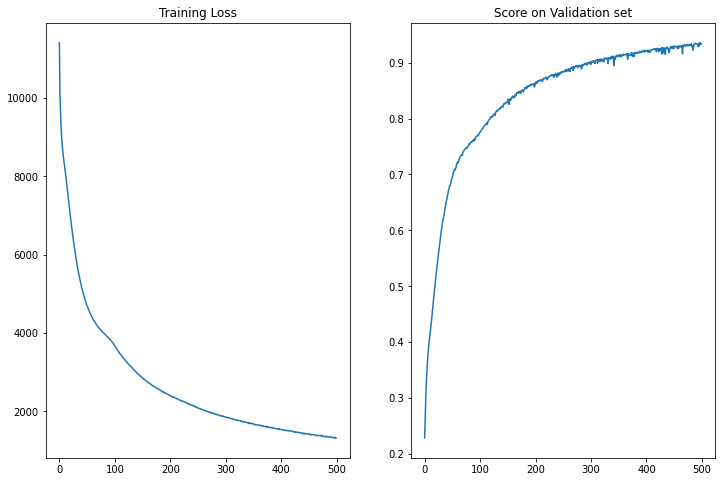

In [41]:
hidden_layer_sizes = [60]
losses_5, test_performance_5, mse_5, loss_5, best_loss_5, loss_curve_5 = MLPModel(hidden_layer_sizes, iter_number,
                                                                                     x_train, y_train, x_test, y_test)
print(f"for model 5: mlp.score={test_performance_5[-1]}, mse={mse_5}, loss_={loss_5}, best_loss={best_loss_5}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_5)), losses_5)
ax2.plot(range(len(test_performance_5)), test_performance_5)
plt.show()

for model 5: mlp.score=0.06654168369277902, mse=30290.659969288456, loss_=12868.939361825087, best_loss=12868.939361825087


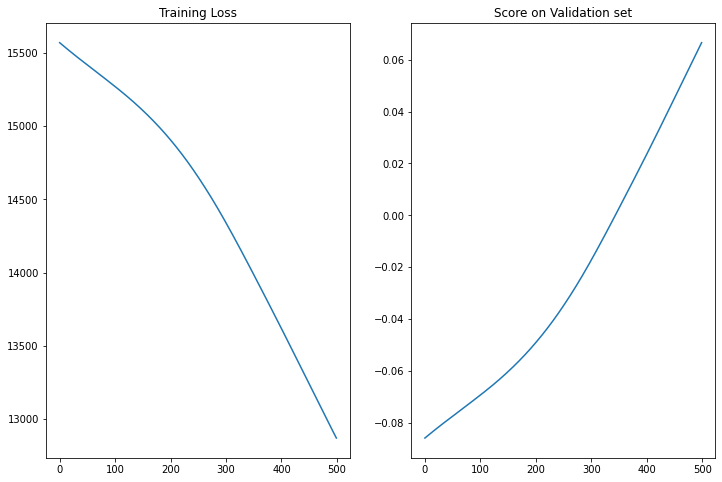

In [42]:
hidden_layer_sizes = [60]
losses_b_5, test_performance_b_5, mse_b_5, loss_b_5, best_loss_b_5, loss_curve_b_5 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = batch_size)
print(f"for model 5: mlp.score={test_performance_b_5[-1]}, mse={mse_b_5}, loss_={loss_b_5}, best_loss={best_loss_b_5}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_b_5)), losses_b_5)
ax2.plot(range(len(test_performance_b_5)), test_performance_b_5)
plt.show()

for model 5: mlp.score=0.7419815201630393, mse=8372.682424055689, loss_=4074.4934027181394, best_loss=4074.4934027181394


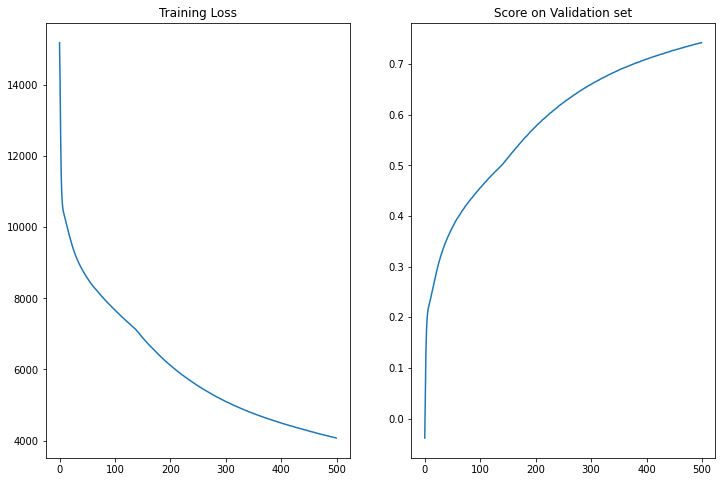

In [43]:
hidden_layer_sizes = [60]
losses_b32_5, test_performance_b32_5, mse_b32_5, loss_b32_5, best_loss_b32_5, loss_curve_b32_5 = MLPModelBatch(hidden_layer_sizes, iter_number,
                                                                                                   x_train, y_train, x_test, y_test, batch_size = 32)
print(f"for model 5: mlp.score={test_performance_b32_5[-1]}, mse={mse_b32_5}, loss_={loss_b32_5}, best_loss={best_loss_b32_5}")
# Plotting results:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.title.set_text("Training Loss")
ax2.title.set_text("Score on Validation set")
ax1.plot(range(len(losses_b32_5)), losses_b32_5)
ax2.plot(range(len(test_performance_b32_5)), test_performance_b32_5)
plt.show()

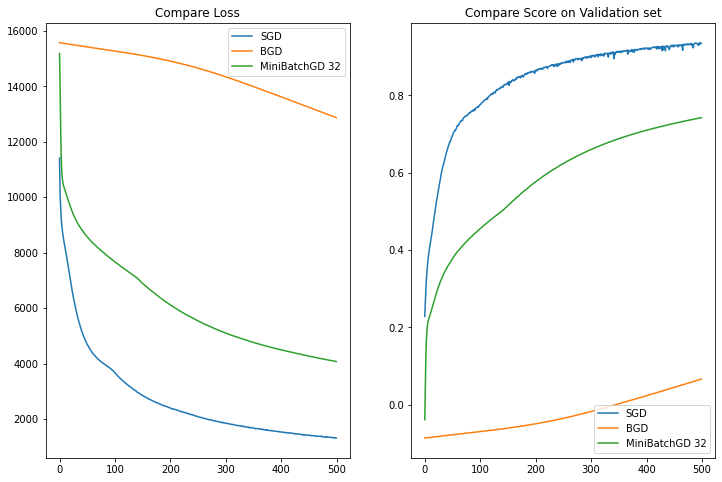

<Figure size 720x360 with 0 Axes>

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig = plt.figure(figsize=(10,5))

ax1.title.set_text("Compare Loss")
ax1.plot(range(len(losses_5)), losses_5, label = "SGD")
ax1.plot(range(len(losses_b_5)), losses_b_5, label = "BGD")
ax1.plot(range(len(losses_b32_5)), losses_b32_5, label = "MiniBatchGD 32")
ax1.legend(loc="upper right")

ax2.title.set_text("Compare Score on Validation set")
ax2.plot(range(len(test_performance_5)), test_performance_5, label = "SGD")
ax2.plot(range(len(test_performance_b_5)), test_performance_b_5, label = "BGD")
ax2.plot(range(len(test_performance_b32_5)), test_performance_b32_5, label = "MiniBatchGD 32")
ax2.legend(loc="lower right")

# Compare different Models

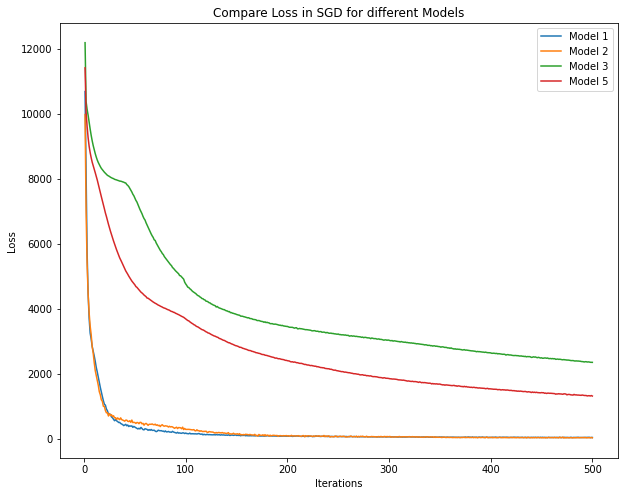

In [45]:
x = range(1, len(losses_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, losses_1, label = "Model 1")
plt.plot(x, losses_2, label = "Model 2")
plt.plot(x, losses_3, label = "Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, losses_5, label = "Model 5")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Compare Loss in SGD for different Models')
plt.legend()
plt.show()

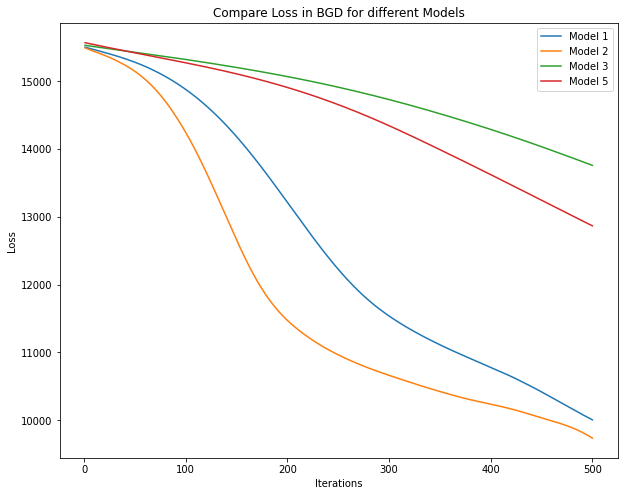

In [46]:
x = range(1, len(losses_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, losses_b_1, label = "Model 1")
plt.plot(x, losses_b_2, label = "Model 2")
plt.plot(x, losses_b_3, label = "Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, losses_b_5, label = "Model 5")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Compare Loss in BGD for different Models')
plt.legend()
plt.show()

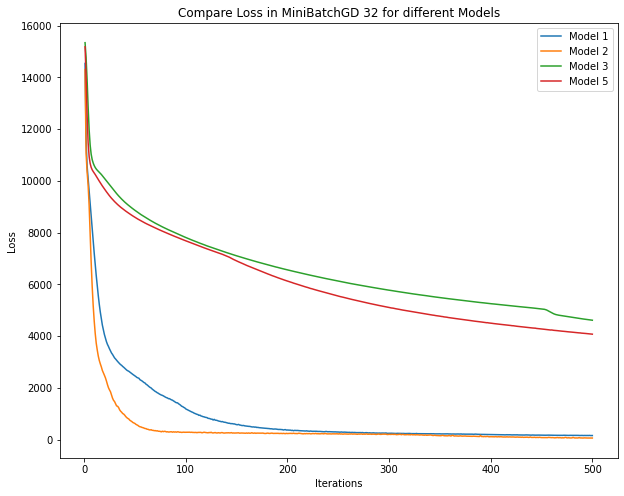

In [49]:
x = range(1, len(losses_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, losses_b32_1, label = "Model 1")
plt.plot(x, losses_b32_2, label = "Model 2")
plt.plot(x, losses_b32_3, label = "Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, losses_b32_5, label = "Model 5")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Compare Loss in MiniBatchGD 32 for different Models')
plt.legend()
plt.show()

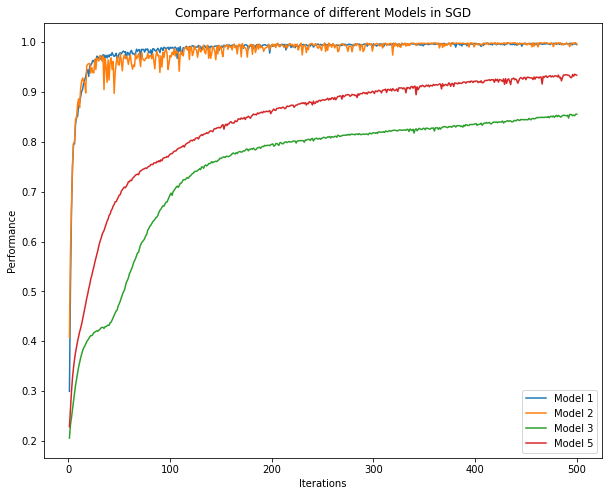

In [47]:
x = range(1, len(test_performance_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, test_performance_1, label = "Model 1")
plt.plot(x, test_performance_2, label = "Model 2")
plt.plot(x, test_performance_3, label = "Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, test_performance_5, label = "Model 5")
plt.xlabel("Iterations")
plt.ylabel("Performance")
plt.title('Compare Performance of different Models in SGD')
plt.legend()
plt.show()

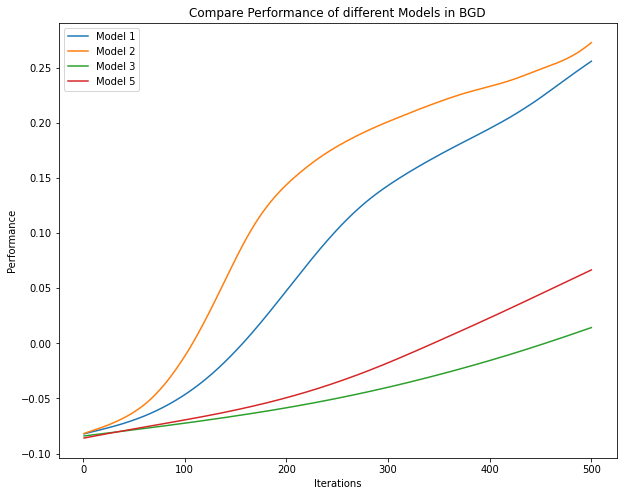

In [48]:
x = range(1, len(test_performance_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, test_performance_b_1, label = "Model 1")
plt.plot(x, test_performance_b_2, label = "Model 2")
plt.plot(x, test_performance_b_3, label = "Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, test_performance_b_5, label = "Model 5")
plt.xlabel("Iterations")
plt.ylabel("Performance")
plt.title('Compare Performance of different Models in BGD')
plt.legend()
plt.show()

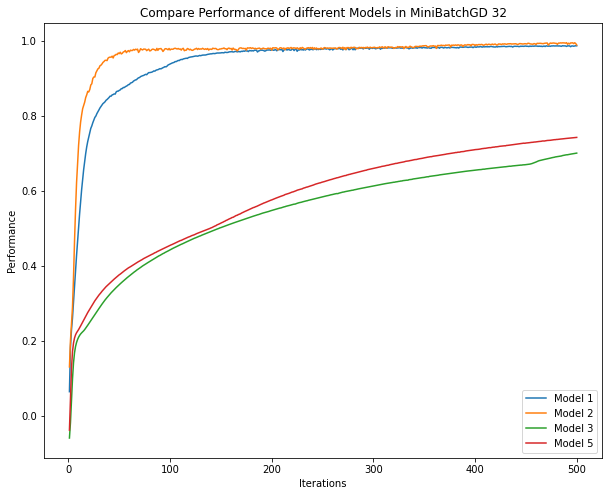

In [50]:
x = range(1, len(test_performance_1)+1)
plt.figure(figsize=(10,8))
plt.plot(x, test_performance_b32_1, label = "Model 1")
plt.plot(x, test_performance_b32_2, label = "Model 2")
plt.plot(x, test_performance_b32_3, label = "Model 3")
# plt.plot(range(991, len(losses_4)+1), losses_4[990:], label = "Loss Model 4")
plt.plot(x, test_performance_b32_5, label = "Model 5")
plt.xlabel("Iterations")
plt.ylabel("Performance")
plt.title('Compare Performance of different Models in MiniBatchGD 32')
plt.legend()
plt.show()